# Predictions with Best SVM model, on the test data set PS2

In [1]:
import music21
import music21.features as features
from music21 import midi
from music21 import stream
from helper_functions import *
from numpy.random import randint

import numpy as np

from collections import namedtuple

In [2]:
TEST_DATA_DIR = './Part1(PS2)/'

test_files_list= get_audio_files(TEST_DATA_DIR)

audio_path = test_files_list[0]

mf = midi.MidiFile()
mf.open(audio_path) # path='abc.midi'
mf.read()
mf.close()

s = midi.translate.midiFileToStream(mf)

print(audio_path)

./Part1(PS2)/0.26551079719260606_adj.mid


In [3]:
print(audio_path)

s.show('midi')

./Part1(PS2)/0.26551079719260606_adj.mid


/home/carlbrady/miniconda3/lib/python3.10/site-packages/music21/midi/translate.py:2314: TranslateWarning: StringInstrument specified 1-indexed MIDI channel 5 but acceptable channels were [2, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]. Defaulting to channel 1.
  warnings.warn(


In [4]:
# for seeding random samples 

from numpy.random import Generator, PCG64
rng = Generator(PCG64(9))


# function to extract n streams, target duration T seconds for composer 

# extracts n_clips each from n_tracks

# will use namedtuples as convient way to store clips, composer info

Clip = namedtuple('Clip',['composer','path','start','stop','seconds','stream'])

def extract_samples(audio_path_list,T=15,n_clips=1,show_streams=False):
    delta_measures = list(range(5,50,1))

    clips = []
    
    for audio_path in audio_path_list:
        
        print(audio_path)
        
        mf = midi.MidiFile()
        mf.open(audio_path) # path='abc.midi'
        mf.read()
        mf.close()
        s = midi.translate.midiFileToStream(mf)

        total_time = s.secondsMap[0]['durationSeconds']

        number_of_measures = len(s[0])  # think this is total number of measures in the stream?

        #print(audio_path,'lasts approx ',total_time,' seconds')
        
        #pick n_clips random measures to start clipping from 
        
        #start_measures = randint(1,number_of_measures//2,size=n_clips)
        start_measures = rng.integers(1,number_of_measures//2,size=n_clips)
        
        for i,start in enumerate(start_measures):
            
            for delta in delta_measures:

                stop = start+delta

                excerpt_stream = s.measures(start,stop)

                clip_time = excerpt_stream.secondsMap[0]['durationSeconds']

                if clip_time>T: # clip sample streams until time is longer than T
                    print('clip: ',i,' --> ','t = ',clip_time,'start = ',start,'stop =',stop,' delta = ',delta)

                    #clip = (composer,audio_path,start,stop,clip_time,excerpt_stream)
                    
                    clip = Clip(composer='UNKNOWN',
                                path=audio_path,
                                start=start,
                                stop=stop,
                                seconds=clip_time,
                                stream = excerpt_stream)
                    
                    clips.append(clip)
                    
                    if show_streams: excerpt_stream.show('midi')
                        
                    break                 
    
    return clips

In [8]:
problem_files = []

problem_files.append(test_files_list.pop(test_files_list.index('./Part1(PS2)/0.539512676743813_adj.mid')))

problem_files

['./Part1(PS2)/0.539512676743813_adj.mid']

In [10]:

test_clips = extract_samples(test_files_list,T=15)

./Part1(PS2)/0.26551079719260606_adj.mid
clip:  0  -->  t =  15.118317728782847 start =  4 stop = 14  delta =  10
./Part1(PS2)/0.3264565808984162_adj.mid
clip:  0  -->  t =  15.550349691797061 start =  32 stop = 42  delta =  10
./Part1(PS2)/0.905499891236923_adj.mid
clip:  0  -->  t =  16.0 start =  7 stop = 14  delta =  7
./Part1(PS2)/0.33695573887576447_adj.mid
clip:  0  -->  t =  18.0 start =  57 stop = 62  delta =  5
./Part1(PS2)/0.3620067189216978_adj.mid
clip:  0  -->  t =  26.857025913199013 start =  17 stop = 22  delta =  5
./Part1(PS2)/0.48367685897240176_adj.mid
clip:  0  -->  t =  18.0 start =  17 stop = 22  delta =  5
./Part1(PS2)/0.7491289879531658_adj.mid
clip:  0  -->  t =  16.0 start =  3 stop = 18  delta =  15
./Part1(PS2)/0.06402123326764841_adj.mid
clip:  0  -->  t =  15.463404488232074 start =  73 stop = 87  delta =  14
./Part1(PS2)/0.21901852969811753_adj.mid
clip:  0  -->  t =  15.652173913043478 start =  1 stop = 6  delta =  5
./Part1(PS2)/0.3334293069825759_adj.

In [11]:
def essential_features_from_stream(s,features_list,output=False):
    
    feature_values_vector = []
    
    for name in features_list: 
        
        extractor = getattr(features.jSymbolic,name+'Feature') 

        fe = extractor(s)
        
        val = fe.extract().vector
        
        feature_values_vector.append(val[0])
        
        if output: print(f'{name} {val}')
            
    return feature_values_vector

In [12]:
features_list=['Range',
 'PitchVariety',
 'NumberOfCommonPitches',
 'NoteDensity',
 'AmountOfArpeggiation',
 'IntervalBetweenStrongestPitches',
 'MostCommonPitchClassPrevalence',
 'MostCommonPitchPrevalence',
 'RelativeStrengthOfTopPitchClasses',
 'RepeatedNotes',
 'MelodicOctaves',
 'SizeOfMelodicArcs',
 'VariabilityOfNoteDuration',
 'MelodicTritones',
 'PitchClassVariety']

In [13]:
clip_stream = test_clips[0].stream

feature_vector = essential_features_from_stream(clip_stream,features_list,output=True)

Range [52]
PitchVariety [30]
NumberOfCommonPitches [1]
NoteDensity [13.036262283007181]
AmountOfArpeggiation [0.4787234042553192]
IntervalBetweenStrongestPitches [2]
MostCommonPitchClassPrevalence [0.2663316582914573]
MostCommonPitchPrevalence [0.09045226130653267]
RelativeStrengthOfTopPitchClasses [0.8113207547169812]
RepeatedNotes [0.026595744680851064]
MelodicOctaves [0.19680851063829788]
SizeOfMelodicArcs [9.055555555555555]
VariabilityOfNoteDuration [0.11762292524298708]
MelodicTritones [0.0]
PitchClassVariety [8]


In [23]:
import re

def extract_data(clips,features_list):
    
    print(f"Beginning Feature Extraction for {len(clips)} clips")
    
    vectors = []
    
    clip_id_codes = []
    
    for i in range(len(clips)):
        
        print(f"extracting clip {(i+1)}/{len(clips)}...")
        #feature_vector = features_from_stream(clips[i].stream,output=False)
        
        feature_vector = essential_features_from_stream(clips[i].stream,features_list,output=False)
        
        path = clips[i].path
        
        code = re.findall(r'(0.\d+)_',path)[0]
        
        vectors.append(feature_vector)
        
        clip_id_codes.append(code)
        
    return clip_id_codes, np.vstack(vectors) 

In [25]:
clip_id_codes , X_PS2_TEST = extract_data(test_clips,features_list)

Beginning Feature Extraction for 34 clips
extracting clip 1/34...
extracting clip 2/34...
extracting clip 3/34...
extracting clip 4/34...
extracting clip 5/34...
extracting clip 6/34...
extracting clip 7/34...
extracting clip 8/34...
extracting clip 9/34...
extracting clip 10/34...
extracting clip 11/34...
extracting clip 12/34...
extracting clip 13/34...
extracting clip 14/34...
extracting clip 15/34...
extracting clip 16/34...
extracting clip 17/34...
extracting clip 18/34...
extracting clip 19/34...
extracting clip 20/34...
extracting clip 21/34...
extracting clip 22/34...
extracting clip 23/34...
extracting clip 24/34...
extracting clip 25/34...
extracting clip 26/34...
extracting clip 27/34...
extracting clip 28/34...
extracting clip 29/34...
extracting clip 30/34...
extracting clip 31/34...
extracting clip 32/34...
extracting clip 33/34...
extracting clip 34/34...


In [20]:
X_PS2_TEST.shape

(34, 15)

In [28]:
clip_id_codes

['0.26551079719260606',
 '0.3264565808984162',
 '0.905499891236923',
 '0.33695573887576447',
 '0.3620067189216978',
 '0.48367685897240176',
 '0.7491289879531658',
 '0.06402123326764841',
 '0.21901852969811753',
 '0.3334293069825759',
 '0.07186746659481313',
 '0.981087291054314',
 '0.9353908329958764',
 '0.23120017256495873',
 '0.22047111832936942',
 '0.09167358800381353',
 '0.36321860283443286',
 '0.30993012400290976',
 '0.549470161204349',
 '0.5807329043589801',
 '0.647959423719129',
 '0.8014751784512073',
 '0.10222964826466285',
 '0.21198476749665085',
 '0.1755252422917658',
 '0.10250888365879718',
 '0.047574444458241216',
 '0.1960551158929671',
 '0.3559970176888735',
 '0.9511403301279795',
 '0.10630249969742178',
 '0.337517805339117',
 '0.033313986422223163',
 '0.002716920481628']

In [26]:
import pickle

filename = "./Saved_Models/RBF_SVM_C_1000_Gamma_02.pickle"

# save model
#pickle.dump(rbf_BEST_FINAL_MODEL, open(filename, "wb"))

# load model
loaded_model = pickle.load(open(filename, "rb"))

In [33]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_PS2_TEST = scaler.fit_transform(X_PS2_TEST)

TEST_PROBS_DF = pd.DataFrame(loaded_model.predict_proba(X_PS2_TEST),columns=['Bach','Beethoven','Brahms','Schubert'])


<AxesSubplot: >

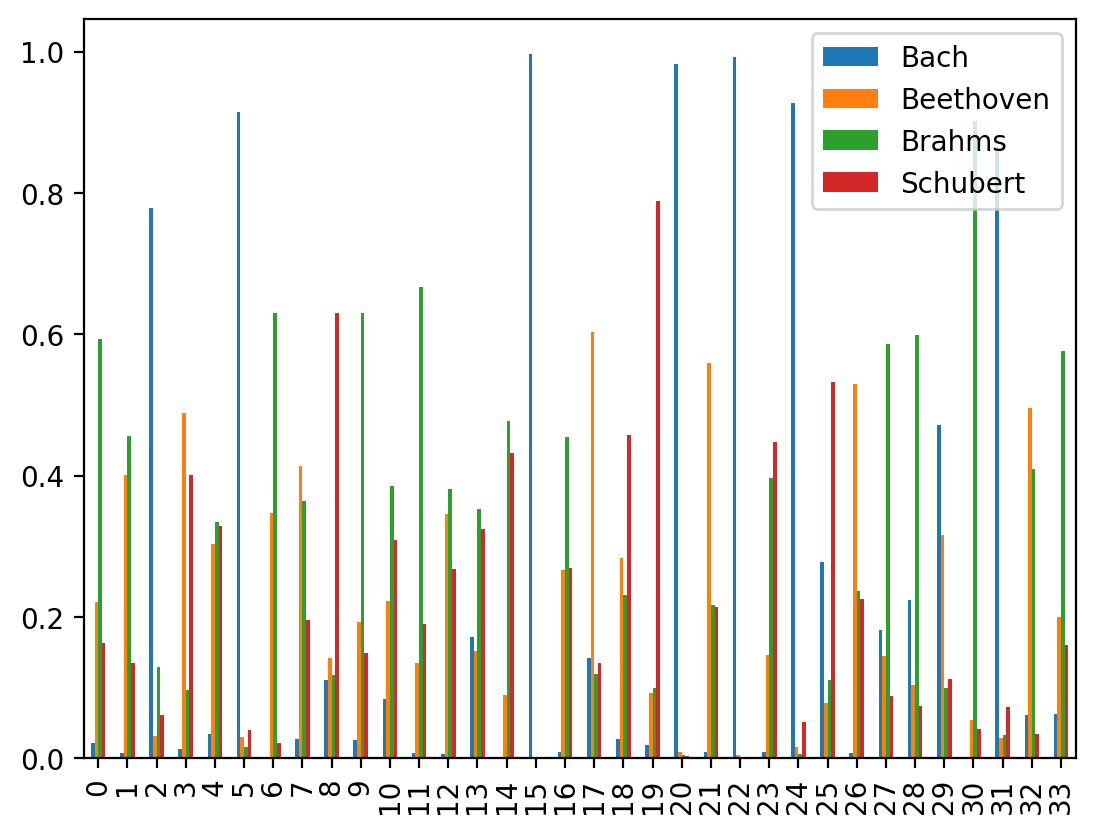

In [34]:
TEST_PROBS_DF.iloc[:,:].plot.bar()

In [35]:
0.5/3

0.16666666666666666

In [97]:
max_prob_values = TEST_PROBS_DF.max(axis=1)

x = np.sort(max_prob_values)

In [86]:
cumulative_dist = []

for i in range(34):
    
    cumulative_dist.append((i+1)/34)

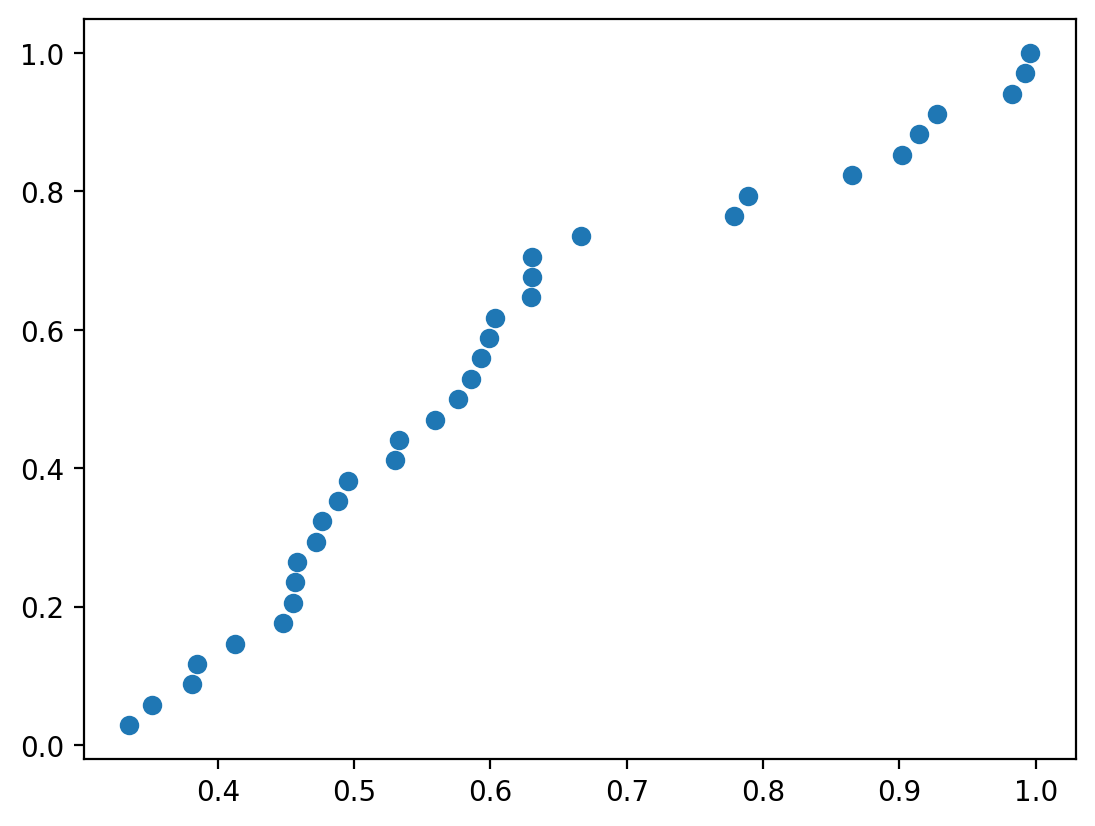

In [87]:
import matplotlib.pyplot as plt

plt.scatter(x,cumulative_dist)
plt.show()

In [118]:
predictions = TEST_PROBS_DF.idxmax(axis=1)

Predictions_DF = pd.concat([pd.Series(clip_id_codes),predictions,predictions,max_prob_values],axis=1)

Predictions_DF.columns = ['Recording ID','Prediction','Prediction Final','SVM Prob']

confidence_threshold = 0.5  ## If the predicted composer has less than 0.5 probability, will predict NONE

Predictions_DF['Prediction Final'][Predictions_DF['SVM Prob']<0.5]='UNKNOWN COMPOSER'

/tmp/ipykernel_1522/177498936.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Predictions_DF['Prediction Final'][Predictions_DF['SVM Prob']<0.5]='UNKNOWN COMPOSER'


In [119]:
Predictions_DF

,Recording ID,Prediction,Prediction Final,SVM Prob
0,0.26551079719260606,Brahms,Brahms,0.593317
1,0.3264565808984162,Brahms,UNKNOWN COMPOSER,0.456677
2,0.905499891236923,Bach,Bach,0.778833
3,0.33695573887576447,Beethoven,UNKNOWN COMPOSER,0.488256
4,0.3620067189216978,Brahms,UNKNOWN COMPOSER,0.334688
5,0.48367685897240176,Bach,Bach,0.914412
6,0.7491289879531658,Brahms,Brahms,0.630682
7,0.06402123326764841,Beethoven,UNKNOWN COMPOSER,0.413008
8,0.21901852969811753,Schubert,Schubert,0.629482
9,0.3334293069825759,Brahms,Brahms,0.630660


In [101]:
max_prob_values

0     0.593317
1     0.456677
2     0.778833
3     0.488256
4     0.334688
5     0.914412
6     0.630682
7     0.413008
8     0.629482
9     0.630660
10    0.384603
11    0.666575
12    0.381398
13    0.352084
14    0.476676
15    0.996063
16    0.455182
17    0.603302
18    0.457910
19    0.789068
20    0.982266
21    0.559648
22    0.992151
23    0.448044
24    0.927312
25    0.532908
26    0.530176
27    0.585758
28    0.598814
29    0.472191
30    0.902153
31    0.865055
32    0.495790
33    0.576109
dtype: float64